#Lab 4 Creating a WordCloud from Wine Dataset

# Install necessary libraries and read the wine_dataset.csv file

In [2]:
pip install wordcloud

     |████████████████████████████████| 220 kB 3.2 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=160333 sha256=e41a5d5f70d9bf3ef181b41236c250781af7403a49daf21aada40ea7802d1dca
  Stored in directory: /Users/kate/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [33]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Load in the dataframe
df = pd.read_csv("wine_dataset.csv")

In [35]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#Print some observations such as how many different wine type exist.

In [36]:
#Example:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

#In this dataset how many different types of wine exist?
#print as "There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir.."

types = df['variety'].unique()
type_str = ', '.join(map(str, types))
print(len(types))
print("There are {} types of wine in this dataset such as {}".format(len(types),type_str))

There are 129971 observations and 14 features in this dataset. 

708
There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir, Tempranillo-Merlot, Frappato, Gewürztraminer, Cabernet Sauvignon, Nerello Mascalese, Chardonnay, Malbec, Tempranillo Blend, Meritage, Red Blend, Merlot, Nero d'Avola, Chenin Blanc, Gamay, Sauvignon Blanc, Viognier-Chardonnay, Primitivo, Catarratto, Inzolia, Petit Verdot, Monica, Bordeaux-style White Blend, Grillo, Sangiovese, Cabernet Franc, Champagne Blend, Bordeaux-style Red Blend, Aglianico, Petite Sirah, Touriga Nacional, Carmenère, Albariño, Petit Manseng, Rosé, Zinfandel, Vernaccia, Rosato, Grüner Veltliner, Viognier, Vermentino, Grenache Blanc, Syrah, Nebbiolo, Shiraz-Cabernet Sauvignon, Pinot Blanc, Alsace white blend, Barbera, Rhône-style Red Blend, Portuguese White, Graciano, Tannat-Cabernet, Sauvignon, Sangiovese Grosso, Torrontés, Prugnolo Gentile, G-S-M, Verdejo, Fumé Blanc, Furmint, Pinot Bi

#Visualize top ten most common Wine Types around the world.

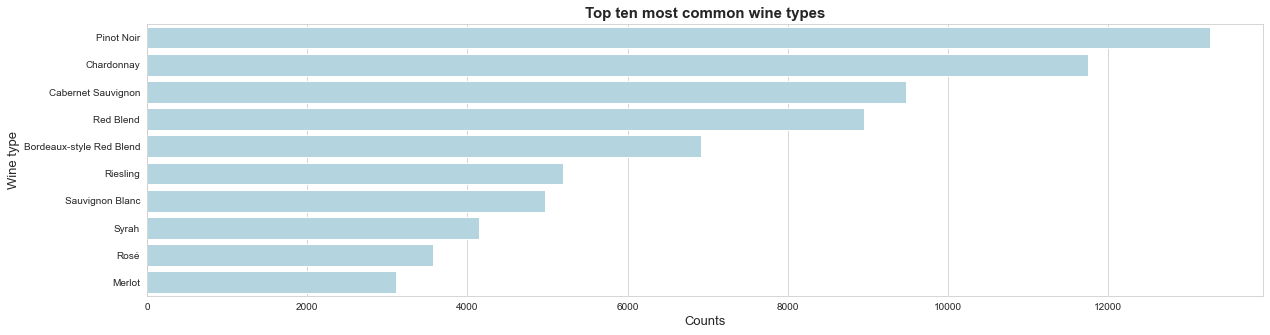

In [37]:
#Visualize top ten wine type
wine_count = df['variety'].value_counts()[:10]

fig = plt.figure(figsize = (20, 5))

sns.set_style("whitegrid")
fig  = sns.barplot(y=wine_count.index ,x=wine_count, color='lightblue')
plt.xlabel("Counts", fontsize = 13)
plt.ylabel("Wine type", fontsize = 13)
plt.title("Top ten most common wine types", fontsize = 15, fontweight="bold") 
plt.show(fig)


# Select the top 5 highest average points among all 44 countries

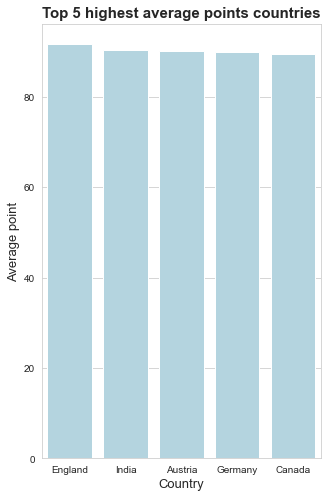

Unnamed: 0                                         \
                            count           mean           std       min   
country                                                                    
Argentina                  3800.0   65075.723158  38080.749866      16.0   
Armenia                       2.0   37158.000000  40995.222746    8170.0   
Australia                  2329.0   65037.539287  37271.655310      77.0   
Austria                    3345.0   65614.296861  37455.323032      93.0   
Bosnia and Herzegovina        2.0   56613.000000  56775.017675   16467.0   
Brazil                       52.0   54921.634615  34659.034110    5852.0   
Bulgaria                    141.0   67618.170213  38223.391414    6970.0   
Canada                      257.0   70582.365759  41156.846472     454.0   
Chile                      4472.0   64582.882156  38129.992872      36.0   
China                         1.0  109989.000000           NaN  109989.0   
Croatia                      73.0   55757.178082  36569.256658    4007.0   
Cyprus                       11.0   58639.181818  37830.365150    7568.0   
Czech Republic               12.0   60073.333333  47970.569090    2272.0   
Egypt                         1.0  110246.000000           NaN  110246.0   
England                      74.0   72597.756757  33719.357565    4073.0   
France                    22093.0   64804.002987  37315.795085       7.0   
Georgia                      86.0   67749.430233  35583.504373    4048.0   
Germany                    2165.0   65787.590762  37396.052311       8.0   
Greece                      466.0   65498.156652  37901.586554     271.0   
Hungary                     146.0   71893.164384  37312.183186     219.0   
India                         9.0   68964.000000  39222.740413    6673.0   
Israel                      505.0   64879.473267  37515.077724     202.0   
Italy                     19540.0   64077.543910  37329.023596       0.0   
Lebanon                      35.0   61872.514286  37548.127872    4896.0   
Luxembourg                    6.0   56476.000000  36841.873915    3576.0   
Macedonia                    12.0   69603.250000  34414.201569   25466.0   
Mexico                       70.0   66731.057143  38277.132781     378.0   
Moldova                      59.0   67654.813559  37676.560469    5996.0   
Morocco                      28.0   72302.035714  30957.876420    6008.0   
New Zealand                1419.0   63523.363636  37917.537076     174.0   
Peru                         16.0   64509.000000  40603.146003    6565.0   
Portugal                   5691.0   63912.912142  37410.786703       1.0   
Romania                     120.0   64722.050000  41952.151731     306.0   
Serbia                       12.0   61052.416667  36991.958744    5085.0   
Slovakia                      1.0   22687.000000           NaN   22687.0   
Slovenia                     87.0   71523.057471  35131.243142    2292.0   
South Africa               1401.0   63761.650250  37848.877810     125.0   
Spain                      6645.0   64915.517231  37409.214416       5.0   
Switzerland                   7.0   59102.285714  41304.188011   14187.0   
Turkey                       90.0   65871.611111  35301.174790    1187.0   
US                        54504.0   65467.828563  37572.539161       2.0   
Ukraine                      14.0   80815.785714  38557.346274   19530.0   
Uruguay                     109.0   61029.834862  40100.365829    4051.0   

                                                                   points  \
                              25%       50%        75%       max    count   
country                                                                     
Argentina                30912.25   65171.5   99149.25  129948.0   3800.0   
Armenia                  22664.00   37158.0   51652.00   66146.0      2.0   
Australia                34120.00   64984.0   96027.00  129726.0   2329.0   
Austria                  32623.00   67701.0   98385.00  129939.0

In [38]:
# Groupby by country
country_pt = df.groupby('country')['points'].mean().sort_values(ascending=False)[:5]
fig = plt.figure(figsize = (5, 8))
sns.set_style("whitegrid")
fig  = sns.barplot(x=country_pt.index ,y=country_pt, color='lightblue')
plt.ylabel("Average point", fontsize = 13)
plt.xlabel("Country", fontsize = 13)
plt.title("Top 5 highest average points countries", fontsize = 15, fontweight="bold") 
plt.show(fig)

# Summary statistic of all countries
df.groupby('country').describe()

# Plot top 10 country by number of wines.

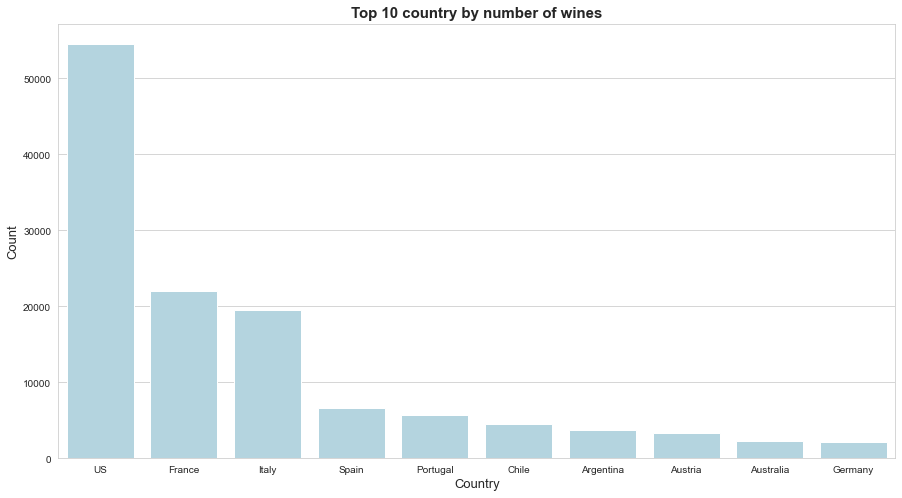

In [39]:
#Plot top 10 country by number of wines
country_num = df['country'].value_counts()[:10]

fig = plt.figure(figsize = (15, 8))
sns.set_style("whitegrid")
fig  = sns.barplot(x=country_num.index ,y=country_num, color='lightblue')
plt.ylabel("Count", fontsize = 13)
plt.xlabel("Country", fontsize = 13)
plt.title("Top 10 country by number of wines", fontsize = 15, fontweight="bold") 
plt.show(fig)


# Plot top 10 countries by its highest rated wine

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


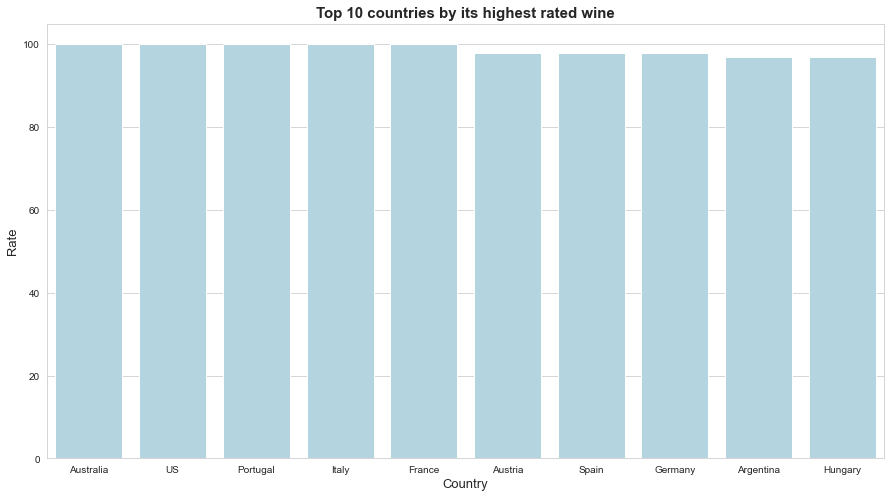

In [40]:
#Plot top 10 countries by its highest rated wine
print(df.columns)
country_rate = df.groupby('country')['points'].max().sort_values(ascending=False)[:10]
country_rate

fig = plt.figure(figsize = (15, 8))
sns.set_style("whitegrid")
fig  = sns.barplot(x=country_rate.index ,y=country_rate, color='lightblue')
plt.ylabel("Rate", fontsize = 13)
plt.xlabel("Country", fontsize = 13)
plt.title("Top 10 countries by its highest rated wine", fontsize = 15, fontweight="bold") 
plt.show(fig)


### Australia, US, Portugal, Italy, and France all have 100 points wine. If you notice, Portugal ranks 5th and Australia ranks 9th in the number of wines produces in the dataset, and both countries have less than 8000 types of wine.

# Wordcloud Time!

# *Create* a word cloud with using following steps;

- Extract the review (text document)
- Create and generate a wordcloud image
- Display the cloud using matplotlib

In [41]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [42]:
# Start with one review:
text = df.description[0]
text

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

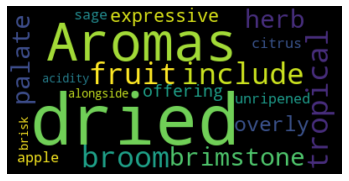

In [43]:
#Example:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Now change some optional arguments of the WordCloud like max_font_size, max_word, and background_color

- set the max_font_size = 50
- max_words=100
- background_color="white

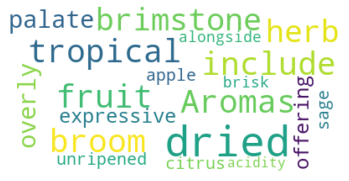

In [44]:
# lower max_font_size, change the maximum number of word and lighten the background:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear',)
plt.axis("off")
plt.show()

# Is changing the max_font_size is a good idea? What change from the previous wordcloud?

It is not a good idea to change max_font_size to 50 in this case because the words with high frequency do not stand out well compared to the previous wordcloud. For example, the word 'dried' was the only word that was repeated twice in the text. In the previous wordcloud, dried has relatively bigger font size and we can easily tell that dried is the most frequent word. On the other hand, wordcloud with max font size "50" didn't show much difference in font size. In this case, increasing font size greater than 100 will make frequent words stand out in the wordcloud.


## **Note:** You've probably noticed the argument *interpolation="bilinear"* in the *plt.imshow()*. This is to make the displayed image appear more smoothly. For more information about the choice, here is a helpful link to explore more about this choice.

Link: https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html

## Now let's combine all wine reviews into one big text and create a big fat cloud to see which characteristics are most common in these wines.

In [45]:
full_text = " ".join(review for review in df.description)

## Following give you the stopwords list, use this list to remove the stopwords and create a wordcloud

In [46]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])


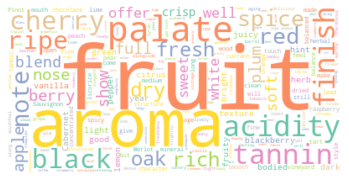

In [47]:
#Answer:
wordcloud = WordCloud(colormap='Set2',background_color='white', stopwords = stopwords, collocations=False).generate(full_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear',)
plt.axis("off")
plt.show()

## From the wordcloud you just created, what is the most common words in the description for all wines?

fruit, aroma, palate, black, acidity, cherry...

## Now let's try to see the wordcloud by country
## We will use "USA, France, Italy, Spain and Portugal" to create indiviual wordclouds by country
## Those are the top 5 countries in number of wines

In [48]:
# Join all reviews of each country:
#Example:
usa = " ".join(review for review in df[df["country"]=="US"].description)

#Do for the rest of the countries for France, Italy, Spain and Portugal.
#Answer:
france = " ".join(review for review in df[df["country"]=="France"].description)
italy = " ".join(review for review in df[df["country"]=="Italy"].description)
spain = " ".join(review for review in df[df["country"]=="Spain"].description)
portugal = " ".join(review for review in df[df["country"]=="Portugal"].description)

# Create a word cloud for each country and use different colormaps matching with their flag colours.
#Reference for other options in the wordcloud:
http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud

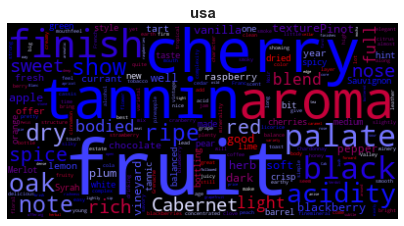

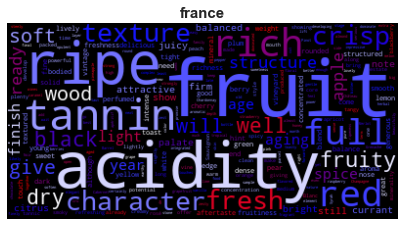

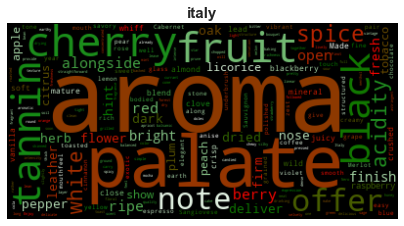

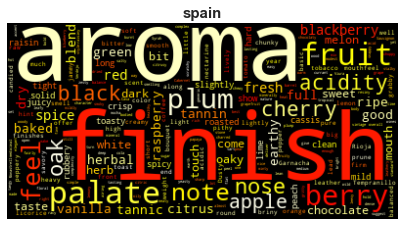

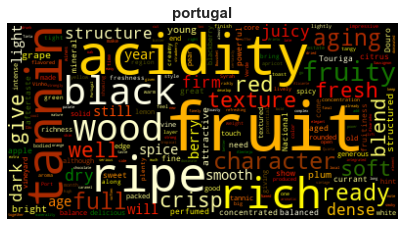

In [50]:
# Generate a word cloud image with using Custom Colormap
#Example for USA
from matplotlib.colors import LinearSegmentedColormap
# colors = ["red", "blue"]
# cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", max_words=1000,colormap=cmap).generate(usa)
# plt.figure(figsize=(7,7))
# plt.imshow(wordcloud_usa, interpolation="bilinear")
# plt.axis("off")

# plt.show()

#You can also use jpg files for colormapping
#Here is a link with more examples: https://mubaris.com/posts/dataviz-wordcloud/

#Repeat this for France, Italy, Spain and Portugal, you can select different colormaps matching with their flag colours
countries_name = ['usa','france', 'italy', 'spain', 'portugal']
countries = [usa, france, italy, spain, portugal]
colors = [["red", "blue", 'white'], ['red', 'blue', 'white'], ['red', 'green', 'white'],['red', 'yellow', 'white'], ['green', 'red','yellow','white']]
i=0
for country in countries:
  color = colors[i]
  cmap = LinearSegmentedColormap.from_list("mycmap", color)
  wordcloud = WordCloud(stopwords=stopwords,max_words=1000,colormap=cmap, collocations=False).generate(country)
  plt.figure(figsize=(7,7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title(countries_name[i], fontsize=15, fontweight='bold')
  plt.axis("off")
  plt.show()
  i += 1